# A look at the Stackoverflow survey data from year 2020

In this notebook, we are using the data from the [Stackoverflow data - 2020 survey.](https://insights.stackoverflow.com/survey)

## Section 1: Business Understanding
<p>
The main motivation for this project is to understand the top paying technologies and developer jobs.<br>
Specifically, we are interested in answering the 3 following questions:
</p>    
<ul>
<li>Question 1: What are the top paying languages?</li>
<li>Question 2: What are the top paying positions?</li>
<li>Question 3: What factors are important while chosing a job, other than salary and location?</li>
</ul>

<p>
Run the cell below to get an overview of the questions included in the survey.
</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import CleanAndCount as t
import CategoricalColumns as c
import PolarPlot as p

df = pd.read_csv('./Project1_Stackoverflow_data/survey_results_public_2020.csv')
schema = pd.read_csv('./Project1_Stackoverflow_data/survey_results_schema_2020.csv')

## Section 2: Data understanding

Now we are taking a closer look at the data. After printing the shape of the dataframe, we see that he dataset contains 60 questions (61 columns, including the respondent ID column) and 50198 respondents.
<p>
Run the cell below to get the size of the database and an overview of the questions included in the survey.
</p>

In [2]:
print(df.shape)
schema

(64461, 61)


,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
5,CompFreq,"Is that compensation weekly, monthly, or yearly?"
6,CompTotal,What is your current total compensation (salar...
7,ConvertedComp,Salary converted to annual USD salaries using ...
8,Country,Where do you live?
9,CurrencyDesc,Which currency do you use day-to-day? If your ...


In [3]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


Now we check the number of missing values in the data base.

In [4]:
(df.isna().sum()/df.shape[0]).head()


Respondent    0.000000
MainBranch    0.004638
Hobbyist      0.000698
Age           0.294985
Age1stCode    0.101782
dtype: float64

## Section 3: Data preparation

### Question 1 - Top paying languages
**1.** For this analysis, we consider full-time  professionals working either company employees or as free-lancers. <p> 
We start by selecting the columns of interest and checking the missing values in each column.
</p>

In [5]:
df_fil_employee = df[['LanguageWorkedWith', 'ConvertedComp', 'WorkWeekHrs', 'Employment']]
df_fil_employee.shape[0] - df_fil_employee.isna().sum()

LanguageWorkedWith    57378
ConvertedComp         34756
WorkWeekHrs           41151
Employment            63854
dtype: int64

From the results we conclude that the column with the most missing values is the ConvertedComp column. We can remove the NA values, because still the number of remaining data is enough to do the analysis (> 34.000).

In [6]:
df_fil_employee = df_fil_employee.dropna(subset=['ConvertedComp', 'LanguageWorkedWith', 'LanguageWorkedWith'], axis=0)
df_fil_employee = df_fil_employee.reset_index()

First, we are checking the results only for full-time employees. To select answers for full-time employees, we are using a mask to filter for the rows with 'Employed full-time' values.

In [7]:
employment_mask = ['Employed full-time']
df_fil_employee = c.filter_employment(df_fil_employee, employment_mask)

Next, we are filtering for the rows with 'Independent contractor, freelancer, or self-employed' values.

In [8]:
df_fil_freelancer = df[['LanguageWorkedWith', 'DevType', 'ConvertedComp', 'JobSat', 'WorkWeekHrs', 'Employment']]
df_fil_freelancer = df_fil_freelancer.dropna(subset=['ConvertedComp', 'LanguageWorkedWith', 'WorkWeekHrs'], axis=0)
df_fil_freelancer = df_fil_freelancer.reset_index()

In [9]:
employment_mask = ['Independent contractor, freelancer, or self-employed']
df_fil_freelancer = c.filter_employment(df_fil_freelancer, employment_mask)

Finally, we want to investigate how often developers are learning a new language and how is this related to their salary. We select the columns of interest and check the non missing values in each row.

In [10]:
df_lang_freq = df[['NEWLearn','ConvertedComp', 'Employment']]
df_lang_freq.shape[0] - df_lang_freq.isna().sum()    

NEWLearn         56156
ConvertedComp    34756
Employment       63854
dtype: int64

From the results above, we coclude that we can remove the NA values, because still the number of remaining data is enough to do the analysis (> 34.000).

In [11]:
df_lang_freq = df[['NEWLearn','ConvertedComp', 'Employment']].dropna()
employment_mask = ['Employed full-time', 'Independent contractor, freelancer, or self-employed']
df_lang_freq = c.filter_employment(df_lang_freq, employment_mask)

#### Question 2 - Top paying developer jobs
**2.** For this analysis, we consider full-time  professionals working either company employees or as free-lancers. <p> 
We start by selecting the columns of interest and checking the missing values in each column.
</p>

In [12]:
df_dev_type = df[['LanguageWorkedWith', 'DevType', 'ConvertedComp', 'JobSat', 'WorkWeekHrs', 'Employment']]
df_dev_type.shape[0] - df_dev_type.isna().sum()

LanguageWorkedWith    57378
DevType               49370
ConvertedComp         34756
JobSat                45194
WorkWeekHrs           41151
Employment            63854
dtype: int64

Again, we see that the column with the most missing values is the ConvertedComp column. We can remove the NA values, because still the number of remaining data is enough to do the analysis (> 34.000).

In [13]:
df_dev_type = df_dev_type.dropna(subset=['ConvertedComp', 'DevType', 'WorkWeekHrs'], axis=0)
df_dev_type = df_dev_type.reset_index()

We filter the data for full-time employees and free-lancers.

In [14]:
devtype_mask = ['Employed full-time', 'Independent contractor, freelancer, or self-employed']
df_dev_type = c.filter_employment(df_dev_type, devtype_mask)

## Section 4: Evaluate the results

### Question 1: Top paying languages

**1a.** How is salary related to the language the developer is working with?

In [15]:
df_agg_employee = c.calculate_salary_per_category(df_fil_employee, 'LanguageWorkedWith')
df_agg_freelancer = c.calculate_salary_per_category(df_fil_freelancer, 'LanguageWorkedWith')

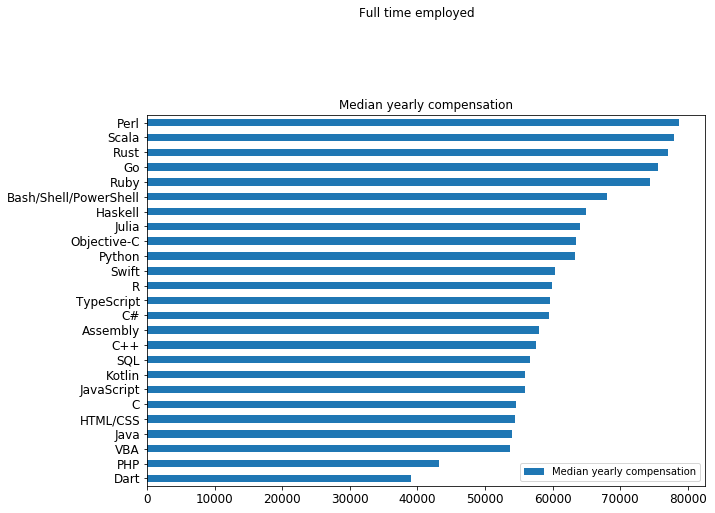

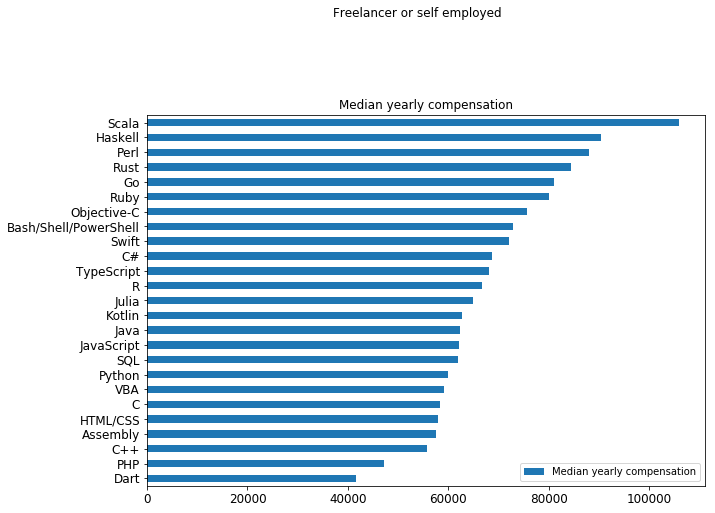

In [16]:
axes = df_agg_employee[['Median yearly compensation']].plot( subplots=True, layout=(2,1), kind='barh', title ="Full time employed", figsize=(10, 15), legend=True, fontsize=12)
axes = df_agg_freelancer[['Median yearly compensation']].plot(subplots=True, layout=(2,1), kind='barh', title ="Freelancer or self employed", figsize=(10, 15), legend=True, fontsize=12)

In [17]:
#ax = df_agg_employee[['Median yearly compensation']].plot(kind='barh', title ="Compensation converted to 40hrs/week employment", figsize=(12, 10), legend=True, fontsize=12)


**1b.** What is the difference between free-lancers and full-time company employees? Below we investigate the impact the employment type has on the salary per each category.

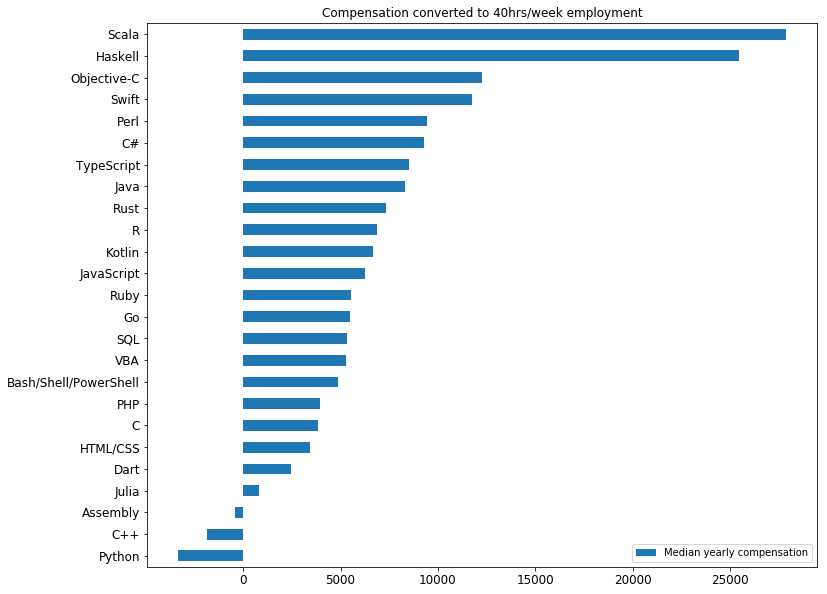

In [18]:
df_diff= (df_agg_freelancer - df_agg_employee).sort_values(by = ['Median yearly compensation'], ascending= True)

ax = df_diff[['Median yearly compensation']].plot(kind='barh', title ="Compensation converted to 40hrs/week employment", figsize=(12, 10), legend=True, fontsize=12)

In [19]:
df_diff.sort_values(by = ['Median yearly compensation'], ascending= False).style.bar(subset=['Median yearly compensation'], align='mid', color=['#d65f5f', '#5fba7d'])

,Median yearly compensation,Std compensation,Counts
Scala,27884,27041.3,-1110
Haskell,25482,-41829.4,-398
Objective-C,12263.5,-198467,-953
Swift,11767.9,-255422,-1389
Perl,9447.78,-196939,-789
C#,9282,-146072,-8721
TypeScript,8505.82,-99850.7,-7700
Java,8291,1.04441e+06,-9667
Rust,7339.82,316080,-1265
R,6865.13,-164329,-1367


**1c.** We are checking alternative ways to plot the results, so that the reuslts are presented on the blogpost.
Below we are using a fancy polar plot.

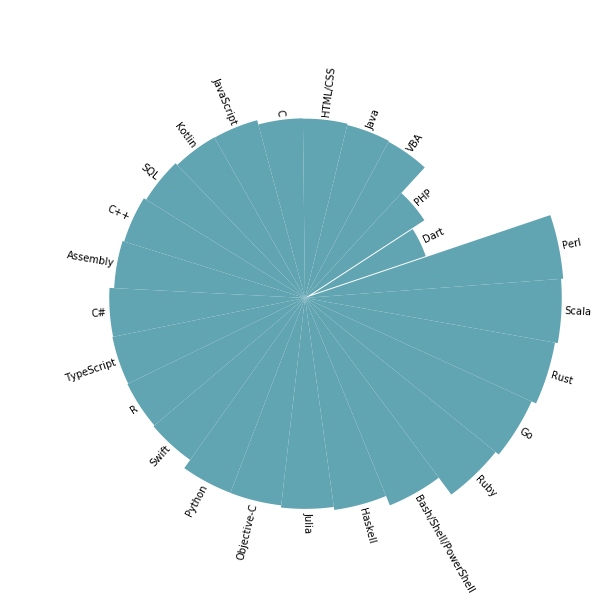

In [20]:
p.polar_plot(df_agg_employee, 'Median yearly compensation')

**1d.** Further, we want to investigate how is does it make sense to learn a new language. We group the results for learning frequency and calculate the median salary.

Text(0.5,1,'Learning frequency vs. compensation')

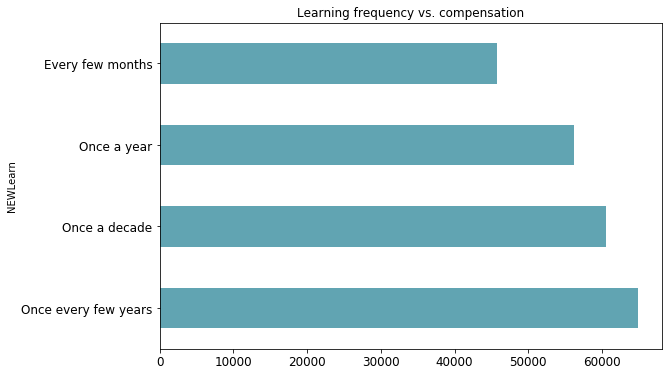

In [21]:
df_lang_freq = df_lang_freq.groupby('NEWLearn').median().sort_values(by='ConvertedComp', ascending=False)

fig = df_lang_freq.plot(kind="barh", legend=None, color='#61a4b2', figsize=(9,6), fontsize=12)
plt.title("Learning frequency vs. compensation")
#plt.box('off')

### Question 2 - Top paying developer jobs

**2a.** How is salary related to the job position of the developer?. To answer this question, we use again the function calculate_salary_per_category to calculate the median salary per each developer job category.

In [22]:
df_agg = c.calculate_salary_per_category(df_dev_type, 'DevType')

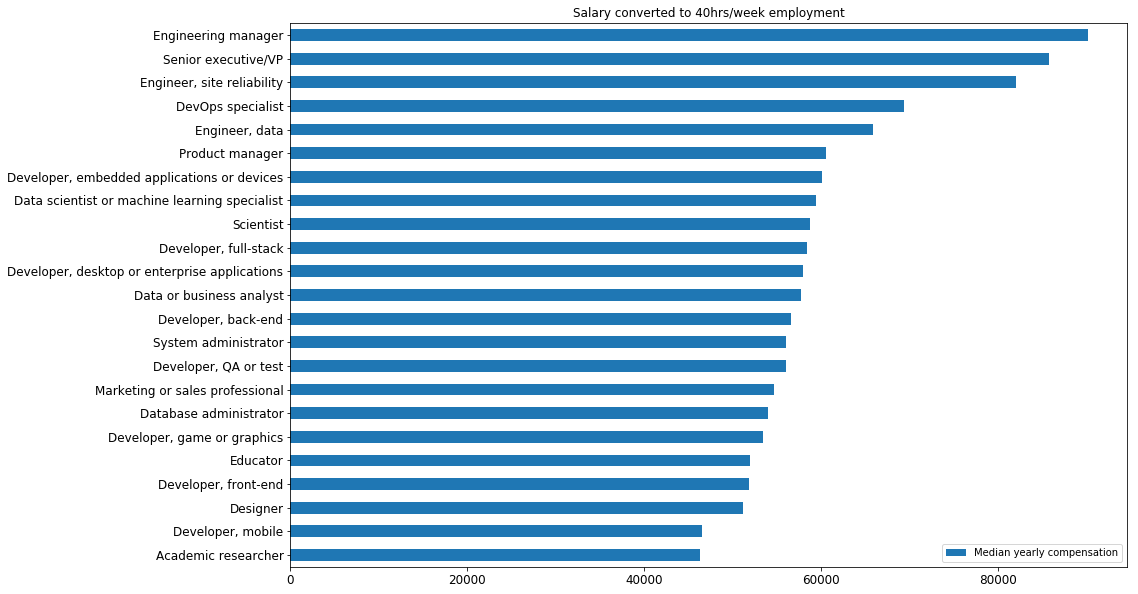

In [23]:
ax = df_agg[['Median yearly compensation']].plot(kind='barh', title ="Salary converted to 40hrs/week employment", figsize=(15, 10), legend=True, fontsize=12)

### Question 3: Job selection factors

**3a.** How is salary related to the job position of the developer?

Specifically, survey is asking the question: ''Imagine that you are deciding between two job offers with the same compensation, benefits, and location. Of the following factors, which 3 are MOST important to you?''

Because multiple values are allowed as a reply, we are using the function clean_and_plot to separate each possible replies and plot the results.

                                                       count
method                                                      
Diversity of the company or organization            0.023403
Specific department or team I’d be working on       0.040111
Financial performance or funding status of the ...  0.040712
Family friendliness                                 0.041361
Industry that I’d be working in                     0.052334
How widely used or impactful my work output wou...  0.071011
Remote work options                                 0.113395
Opportunities for professional development          0.141103
Flex time or a flexible schedule                    0.149637
Office environment or company culture               0.151882
Languages, frameworks, and other technologies I...  0.175050


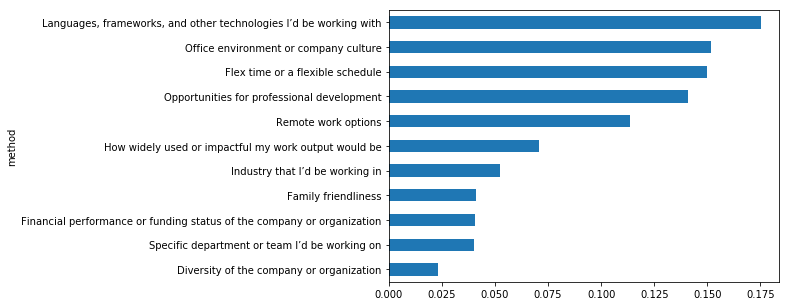

In [24]:
possible_vals = ['Remote work options', 'Office environment or company culture',
                'Financial performance or funding status of the company or organization',
                'Opportunities for professional development',
                'Diversity of the company or organization',
                'How widely used or impactful my work output would be',
                'Industry that I’d be working in',
                'Specific department or team I’d be working on',
                'Flex time or a flexible schedule',
                'Languages, frameworks, and other technologies I’d be working with',
                'Family friendliness']

props_df = t.clean_and_plot(df, 'JobFactors', possible_vals)
#title='Job selection factors'

**b.** Here we want to learn which are the main sources used by the developers to get informed over a potential employer. 

Specifically, survey is asking the question:'When job searching, how do you learn more about a company? Select all that apply.'

We are using again the function clean_and_plot to, because multiple answers are possible by each respondent.

                                                       count
method                                                      
Publicly available financial information (e.g. ...  0.085110
Directly asking current or past employees at th...  0.116699
Read other media like news articles, founder pr...  0.158747
Personal network - friends or family                0.204372
Read company media, such as employee blogs or c...  0.210569
Company reviews from third party sites (e.g. Gl...  0.224504


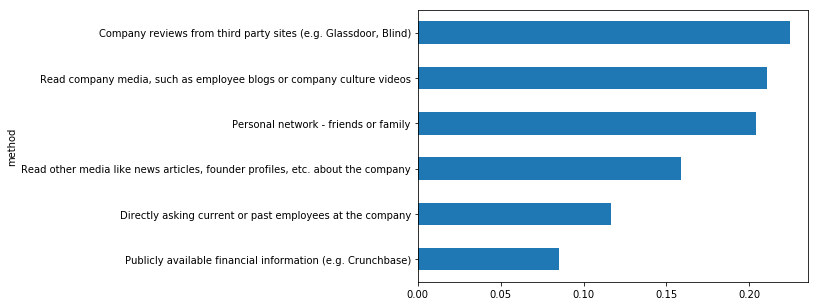

In [25]:
possible_vals = ['Read company media, such as employee blogs or company culture videos',
                'Company reviews from third party sites (e.g. Glassdoor, Blind)',
                'Publicly available financial information (e.g. Crunchbase)',
                'Personal network - friends or family',
                'Read other media like news articles, founder profiles, etc. about the company',
                'Directly asking current or past employees at the company']

props_df = t.clean_and_plot(df, 'NEWJobHuntResearch', possible_vals)
#title='How do you learn more about a company when job searching'

### Conclusion - Drives for searching for a new job

As a final step, we want to have a look at the main reasons driving someone to start searching for a new job. In this case also, we are using the function clean_and_plot to process the multiple answers present in each row.

                                                       count
method                                                      
Wanting to share accomplishments with a wider n...  0.025022
Trouble with my teammates                           0.028338
Just because                                        0.029965
Trouble with my direct manager                      0.041332
Having a bad day (or week or month) at work         0.049303
Looking to relocate                                 0.063883
Trouble with leadership at my company               0.065119
Better work/life balance                            0.117284
Growth or leadership opportunities                  0.128663
Curious about other opportunities                   0.138870
Wanting to work with new technologies               0.142220
Better compensation                                 0.170001


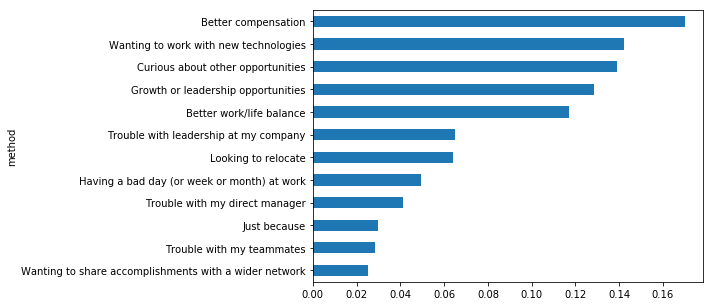

In [26]:
possible_vals = ['Just because',
                'Having a bad day (or week or month) at work',
                'Wanting to share accomplishments with a wider network',
                'Curious about other opportunities',
                'Better compensation',
                'Trouble with my teammates',
                'Trouble with my direct manager',
                'Trouble with leadership at my company',  
                 'Better work/life balance',
                'Wanting to work with new technologies',
                'Growth or leadership opportunities',
                'Looking to relocate']
df1 = df.dropna(subset=['NEWJobHunt'])

props_df = t.clean_and_plot(df1, 'NEWJobHunt', possible_vals)